### 전기 생산량 만들기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn

%matplotlib inline

In [2]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('./data/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')

e2018 = pd.read_csv("./data/Electric_2018.csv", encoding='cp949')
max_s = pd.read_csv("./data/Maximum_supply.csv", encoding='cp949')
eratio = pd.read_excel("./data/energy_ratio.xls")
gpb =  pd.read_excel("./data/gas_profan_butane.xls")
e_df = pd.read_csv("./data/한국전력거래소_시간별 발전량_20201231.csv", encoding="cp949")
test = pd.read_csv("./data/test.csv")
sub = pd.read_csv("./data/sample_submission.csv")

In [4]:
df.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [5]:
df.tail()

,연월일,시간,구분,공급량
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953
368087,2018-12-31,24,H,560.896


In [6]:
e2018.head()

,거래일자,지역,연료원,발전량
0,2018-01-01,강원도,석탄,46702.25924
1,2018-01-01,경기도,석탄,1095.34614
2,2018-01-01,경상남도,석탄,143844.15300
3,2018-01-01,경상북도,석탄,2742.10748
4,2018-01-01,대구시,석탄,0.00000


In [7]:
e2018["연료원"].unique()

array(['석탄', '유류', 'LNG'], dtype=object)

In [8]:
# LNG만으로만 뽑기 , 0 지우기
e2018_lng = e2018.loc[e2018["연료원"] == 'LNG', : ]
e2018_lng = e2018_lng[e2018_lng["발전량"] != 0 ]
e2018_lng["거래일자"] = pd.to_datetime(e2018_lng["거래일자"])

In [9]:
e2018_lng

,거래일자,지역,연료원,발전량
19,2018-01-01,강원도,LNG,7002.801960
20,2018-01-01,경기도,LNG,114569.459900
22,2018-01-01,광주시,LNG,1784.461196
23,2018-01-01,대구시,LNG,361.781280
24,2018-01-01,부산시,LNG,1332.423480
...,...,...,...,...
43452,2021-07-31,인천시,LNG,86891.808270
43453,2021-07-31,전라남도,LNG,37889.518970
43454,2021-07-31,전라북도,LNG,2184.014610
43455,2021-07-31,제주도,LNG,5113.551310


In [10]:
e2018_lng.drop(["지역", "연료원"], axis=1, inplace=True)
e2018_lng

,거래일자,발전량
19,2018-01-01,7002.801960
20,2018-01-01,114569.459900
22,2018-01-01,1784.461196
23,2018-01-01,361.781280
24,2018-01-01,1332.423480
...,...,...
43452,2021-07-31,86891.808270
43453,2021-07-31,37889.518970
43454,2021-07-31,2184.014610
43455,2021-07-31,5113.551310


In [11]:
e2018_lng = e2018_lng.query("거래일자 >= '2018-01-01' and 거래일자 <='2018-12-31'")
e2018_lng

,거래일자,발전량
19,2018-01-01,7002.801960
20,2018-01-01,114569.459900
22,2018-01-01,1784.461196
23,2018-01-01,361.781280
24,2018-01-01,1332.423480
...,...,...
12040,2018-12-31,47936.433060
12041,2018-12-31,21583.044560
12042,2018-12-31,5044.290090
12043,2018-12-31,11959.770540


In [12]:
e_df

,거래일,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2017-01-01,55122.00025,52867.08431,51112.85964,50228.43714,50270.22378,50799.94295,50977.49163,50159.77005,49592.16798,...,49326.41341,49371.40992,49589.38287,51882.15402,53668.27648,53537.42430,53490.78492,53574.56477,54804.75240,55415.26297
1,2017-01-02,53229.02548,52920.74405,52521.67207,52558.05400,53271.30338,54905.05820,56645.02366,58570.71254,64429.09414,...,65638.65262,65560.15769,66293.47450,66666.54602,65854.39132,64004.04846,62153.75753,60619.74204,60606.06141,61807.70918
2,2017-01-03,58347.54895,57012.44028,56541.88017,56513.31631,57373.69797,58908.70117,61596.09922,64252.66753,68662.06271,...,66752.04802,66488.28873,67703.83451,68683.59288,68571.18682,66663.57764,64526.28462,62889.17741,62559.95542,63718.92409
3,2017-01-04,60016.32336,58366.48843,58643.34614,58715.11106,58916.98777,59710.07343,61895.51298,64259.83376,69180.34447,...,67257.05729,66809.35692,67653.22112,68143.51424,67470.51174,65571.37045,63998.52134,62667.07412,62512.13690,63744.05670
4,2017-01-05,59751.77799,57865.01145,58001.78231,57893.72453,58456.74216,59722.97433,62058.10242,64262.80299,69080.14776,...,69860.23713,69280.43397,69700.31720,69391.24809,68039.52590,65975.46819,63804.64394,62122.48427,61813.14500,63178.04751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2020-12-27,56907.94023,55263.85119,54509.86669,54302.74277,54427.37426,55111.31336,55369.52876,54912.44000,54287.05380,...,54769.26243,55593.88808,56958.39495,59255.80044,59976.82793,59152.58702,58299.85071,57011.24959,57405.14323,57879.55667
1457,2020-12-28,55303.38221,53867.75542,53593.55773,53633.36705,54686.46798,56602.62245,60392.09869,64975.96992,71583.83459,...,66717.18025,67589.84730,70116.99232,70609.45784,69484.16264,67367.38019,65468.19805,63194.94007,62494.80122,63855.76471
1458,2020-12-29,60603.57923,58670.88951,58175.41973,58679.62442,59656.28676,61194.96948,63613.98119,67437.63509,72897.90959,...,75069.34985,75029.24404,75429.15474,74007.09861,71611.59551,69816.44913,67918.50423,65168.30364,64290.29541,65855.87134
1459,2020-12-30,63550.47923,61662.77370,60808.41559,61434.17188,62181.37960,64138.69224,67057.50739,71360.28479,77324.77648,...,77835.81539,78377.08386,79865.29939,78778.08163,76140.22272,73281.13142,70829.03643,67635.75246,66881.72669,68337.16958


In [13]:
e_df["거래일"] = pd.to_datetime(e_df["거래일"])

In [14]:
data_s = e_df.loc[(e_df["거래일"] >= '2017-01-01') & (e_df["거래일"] <= '2018-12-31')]
data_s

,거래일,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2017-01-01,55122.00025,52867.08431,51112.85964,50228.43714,50270.22378,50799.94295,50977.49163,50159.77005,49592.16798,...,49326.41341,49371.40992,49589.38287,51882.15402,53668.27648,53537.42430,53490.78492,53574.56477,54804.75240,55415.26297
1,2017-01-02,53229.02548,52920.74405,52521.67207,52558.05400,53271.30338,54905.05820,56645.02366,58570.71254,64429.09414,...,65638.65262,65560.15769,66293.47450,66666.54602,65854.39132,64004.04846,62153.75753,60619.74204,60606.06141,61807.70918
2,2017-01-03,58347.54895,57012.44028,56541.88017,56513.31631,57373.69797,58908.70117,61596.09922,64252.66753,68662.06271,...,66752.04802,66488.28873,67703.83451,68683.59288,68571.18682,66663.57764,64526.28462,62889.17741,62559.95542,63718.92409
3,2017-01-04,60016.32336,58366.48843,58643.34614,58715.11106,58916.98777,59710.07343,61895.51298,64259.83376,69180.34447,...,67257.05729,66809.35692,67653.22112,68143.51424,67470.51174,65571.37045,63998.52134,62667.07412,62512.13690,63744.05670
4,2017-01-05,59751.77799,57865.01145,58001.78231,57893.72453,58456.74216,59722.97433,62058.10242,64262.80299,69080.14776,...,69860.23713,69280.43397,69700.31720,69391.24809,68039.52590,65975.46819,63804.64394,62122.48427,61813.14500,63178.04751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2018-12-27,65157.43082,63071.42432,63036.85173,63359.98903,63916.10670,65443.65979,67936.77951,72160.04253,78042.50116,...,76845.47340,77806.06806,79932.58994,79777.87611,77735.17729,75293.60737,72998.87067,70630.60555,69824.74088,71606.83247
726,2018-12-28,68414.52141,67206.36727,66478.22246,66008.44295,66287.95015,67638.62943,69403.87745,72309.43143,79466.05193,...,77299.05395,77233.97907,78337.62343,77573.89765,75346.50678,72919.22540,71272.36143,69388.42465,68481.53029,70426.31725
727,2018-12-29,67623.23629,65618.74639,64610.08404,64395.65307,64071.67618,64494.44257,65161.07126,64907.88622,66335.55395,...,63102.51147,63349.70325,64663.48351,66065.95395,66458.25409,65539.26200,64686.39537,63632.67076,64100.10049,66226.95378
728,2018-12-30,63835.65445,61900.36640,61184.32145,60720.44679,60547.67781,60884.53109,60183.39696,59412.34887,59276.93476,...,57919.17343,58446.80052,59985.24160,62513.04703,64028.74885,63688.34482,63024.26730,62478.30942,63131.66423,63775.23979


In [15]:
data_s = data_s.iloc[:, 1:]
data_s

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,55122.00025,52867.08431,51112.85964,50228.43714,50270.22378,50799.94295,50977.49163,50159.77005,49592.16798,49722.51782,...,49326.41341,49371.40992,49589.38287,51882.15402,53668.27648,53537.42430,53490.78492,53574.56477,54804.75240,55415.26297
1,53229.02548,52920.74405,52521.67207,52558.05400,53271.30338,54905.05820,56645.02366,58570.71254,64429.09414,67943.25673,...,65638.65262,65560.15769,66293.47450,66666.54602,65854.39132,64004.04846,62153.75753,60619.74204,60606.06141,61807.70918
2,58347.54895,57012.44028,56541.88017,56513.31631,57373.69797,58908.70117,61596.09922,64252.66753,68662.06271,71201.37381,...,66752.04802,66488.28873,67703.83451,68683.59288,68571.18682,66663.57764,64526.28462,62889.17741,62559.95542,63718.92409
3,60016.32336,58366.48843,58643.34614,58715.11106,58916.98777,59710.07343,61895.51298,64259.83376,69180.34447,71630.16282,...,67257.05729,66809.35692,67653.22112,68143.51424,67470.51174,65571.37045,63998.52134,62667.07412,62512.13690,63744.05670
4,59751.77799,57865.01145,58001.78231,57893.72453,58456.74216,59722.97433,62058.10242,64262.80299,69080.14776,71715.61673,...,69860.23713,69280.43397,69700.31720,69391.24809,68039.52590,65975.46819,63804.64394,62122.48427,61813.14500,63178.04751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,65157.43082,63071.42432,63036.85173,63359.98903,63916.10670,65443.65979,67936.77951,72160.04253,78042.50116,79822.02050,...,76845.47340,77806.06806,79932.58994,79777.87611,77735.17729,75293.60737,72998.87067,70630.60555,69824.74088,71606.83247
726,68414.52141,67206.36727,66478.22246,66008.44295,66287.95015,67638.62943,69403.87745,72309.43143,79466.05193,82099.92325,...,77299.05395,77233.97907,78337.62343,77573.89765,75346.50678,72919.22540,71272.36143,69388.42465,68481.53029,70426.31725
727,67623.23629,65618.74639,64610.08404,64395.65307,64071.67618,64494.44257,65161.07126,64907.88622,66335.55395,66391.49218,...,63102.51147,63349.70325,64663.48351,66065.95395,66458.25409,65539.26200,64686.39537,63632.67076,64100.10049,66226.95378
728,63835.65445,61900.36640,61184.32145,60720.44679,60547.67781,60884.53109,60183.39696,59412.34887,59276.93476,58616.34915,...,57919.17343,58446.80052,59985.24160,62513.04703,64028.74885,63688.34482,63024.26730,62478.30942,63131.66423,63775.23979


In [16]:
data_s.columns = [i for i in range(1,25)]
data_s

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,55122.00025,52867.08431,51112.85964,50228.43714,50270.22378,50799.94295,50977.49163,50159.77005,49592.16798,49722.51782,...,49326.41341,49371.40992,49589.38287,51882.15402,53668.27648,53537.42430,53490.78492,53574.56477,54804.75240,55415.26297
1,53229.02548,52920.74405,52521.67207,52558.05400,53271.30338,54905.05820,56645.02366,58570.71254,64429.09414,67943.25673,...,65638.65262,65560.15769,66293.47450,66666.54602,65854.39132,64004.04846,62153.75753,60619.74204,60606.06141,61807.70918
2,58347.54895,57012.44028,56541.88017,56513.31631,57373.69797,58908.70117,61596.09922,64252.66753,68662.06271,71201.37381,...,66752.04802,66488.28873,67703.83451,68683.59288,68571.18682,66663.57764,64526.28462,62889.17741,62559.95542,63718.92409
3,60016.32336,58366.48843,58643.34614,58715.11106,58916.98777,59710.07343,61895.51298,64259.83376,69180.34447,71630.16282,...,67257.05729,66809.35692,67653.22112,68143.51424,67470.51174,65571.37045,63998.52134,62667.07412,62512.13690,63744.05670
4,59751.77799,57865.01145,58001.78231,57893.72453,58456.74216,59722.97433,62058.10242,64262.80299,69080.14776,71715.61673,...,69860.23713,69280.43397,69700.31720,69391.24809,68039.52590,65975.46819,63804.64394,62122.48427,61813.14500,63178.04751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,65157.43082,63071.42432,63036.85173,63359.98903,63916.10670,65443.65979,67936.77951,72160.04253,78042.50116,79822.02050,...,76845.47340,77806.06806,79932.58994,79777.87611,77735.17729,75293.60737,72998.87067,70630.60555,69824.74088,71606.83247
726,68414.52141,67206.36727,66478.22246,66008.44295,66287.95015,67638.62943,69403.87745,72309.43143,79466.05193,82099.92325,...,77299.05395,77233.97907,78337.62343,77573.89765,75346.50678,72919.22540,71272.36143,69388.42465,68481.53029,70426.31725
727,67623.23629,65618.74639,64610.08404,64395.65307,64071.67618,64494.44257,65161.07126,64907.88622,66335.55395,66391.49218,...,63102.51147,63349.70325,64663.48351,66065.95395,66458.25409,65539.26200,64686.39537,63632.67076,64100.10049,66226.95378
728,63835.65445,61900.36640,61184.32145,60720.44679,60547.67781,60884.53109,60183.39696,59412.34887,59276.93476,58616.34915,...,57919.17343,58446.80052,59985.24160,62513.04703,64028.74885,63688.34482,63024.26730,62478.30942,63131.66423,63775.23979


In [17]:
data_s = data_s.transpose()
data_s

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
1,55122.00025,53229.02548,58347.54895,60016.32336,59751.77799,59385.21511,59325.36353,55301.45395,52537.46194,60341.30953,...,62427.02918,57504.60479,57593.34987,63624.40865,59971.48896,65157.43082,68414.52141,67623.23629,63835.65445,61254.05380
2,52867.08431,52920.74405,57012.44028,58366.48843,57865.01145,57436.47029,56590.17752,52764.43546,51703.20465,59209.59118,...,60274.55897,54899.68600,56355.48742,60862.38071,58567.91172,63071.42432,67206.36727,65618.74639,61900.36640,59882.94221
3,51112.85964,52521.67207,56541.88017,58643.34614,58001.78231,57132.61829,55137.04323,51774.50989,51249.83952,58882.72102,...,59528.65436,54191.80824,56231.57220,59687.95757,58246.45209,63036.85173,66478.22246,64610.08404,61184.32145,59630.78255
4,50228.43714,52558.05400,56513.31631,58715.11106,57893.72453,56848.13577,55494.96263,51918.51138,51599.05945,58723.11316,...,59377.69651,54408.07863,56627.28386,59573.82685,58408.69699,63359.98903,66008.44295,64395.65307,60720.44679,59297.20983
5,50270.22378,53271.30338,57373.69797,58916.98777,58456.74216,57575.20899,56221.11195,52546.71067,52469.27348,59284.12078,...,59668.86209,54992.72537,57604.20098,59890.77332,59422.87808,63916.10670,66287.95015,64071.67618,60547.67781,59482.40367
6,50799.94295,54905.05820,58908.70117,59710.07343,59722.97433,58817.55906,57226.40026,52829.67664,54302.69176,60808.54306,...,60456.11097,55773.96796,59390.02039,60245.23226,60903.12941,65443.65979,67638.62943,64494.44257,60884.53109,60554.89089
7,50977.49163,56645.02366,61596.09922,61895.51298,62058.10242,61444.63978,58335.87332,52952.62755,57056.19671,63114.24601,...,60977.47177,55485.17196,62064.70153,60896.96781,63871.03825,67936.77951,69403.87745,65161.07126,60183.39696,62795.50160
8,50159.77005,58570.71254,64252.66753,64259.83376,64262.80299,63599.18939,58768.70786,52647.51816,59958.21307,64579.89071,...,60903.18249,54391.07027,65673.88142,61233.71222,67864.33691,72160.04253,72309.43143,64907.88622,59412.34887,66144.03003
9,49592.16798,64429.09414,68662.06271,69180.34447,69080.14776,67805.22411,60453.48547,52735.18274,67177.29046,69925.68385,...,62526.27330,54702.83605,72568.44053,62693.89347,74237.68309,78042.50116,79466.05193,66335.55395,59276.93476,70159.38446
10,49722.51782,67943.25673,71201.37381,71630.16282,71715.61673,69729.70296,61067.76219,52362.80413,70436.90074,72206.17172,...,62019.78626,54841.53122,73765.42137,63007.46844,76236.14904,79822.02050,82099.92325,66391.49218,58616.34915,71181.74752


In [18]:
list(np.array(data_s[0].tolist()))

[55122.00025,
 52867.08431,
 51112.85964,
 50228.43714,
 50270.22378,
 50799.94295,
 50977.49163,
 50159.77005,
 49592.16798,
 49722.51782,
 49953.99787,
 49637.58557,
 49429.43912,
 49185.34085,
 49326.41341,
 49371.40992,
 49589.38287,
 51882.15402,
 53668.27648,
 53537.4243,
 53490.78492,
 53574.56477,
 54804.7524,
 55415.26297]

### 전기 발전량 비율로 구해서 전체값 예측하기

In [19]:
# eratio에 있는 데이터를 근거로 수동으로 데이터 뽑아서 사용.
eratio

,통계표명:,에너지원별 발전량 현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,단위:,"GWh, %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,계,원자력,석탄,가스,신재생,유류,양수,기타
2,2011,발전량,"496,893","154,723","202,856","112,646","12,190","11,245","3,233",-
3,NaN,비중,100.0,31.1,40.8,22.7,2.5,2.3,0.7,-
4,2012,발전량,"509,574","150,327","202,191","125,285","12,587","15,501","3,683",-
5,NaN,비중,100.0,29.5,39.7,24.6,2.5,3.0,0.7,-
6,2013,발전량,"517,148","138,784","204,196","139,783","14,449","15,832","4,105",-
7,NaN,비중,100.0,26.8,39.5,27.0,2.8,3.1,0.8,-
8,2014,발전량,"521,971","156,407","207,214","127,472","17,447","8,364","5,068",-
9,NaN,비중,100.0,30.0,39.7,24.4,3.3,1.6,1.0,-


In [20]:
# 에너지원별 발전량
# 가스 발전량 (GWh) / 총 화력발전량 퍼센티지
gas_dict = { 2013 :[139783, 27.0], 
            2014:[127472,24.4], 
            2015:[118695, 22.5], 2016: 
            [121018, 22.4], 
            2017 : [126039, 22.8], 
            2018:[152924,26.8]}

In [21]:
gas_dict.keys()

dict_keys([2013, 2014, 2015, 2016, 2017, 2018])

In [22]:
gas_dict.values()

dict_values([[139783, 27.0], [127472, 24.4], [118695, 22.5], [121018, 22.4], [126039, 22.8], [152924, 26.8]])

In [23]:
list(gas_dict.values())[0][0]

139783

In [24]:
gwh = []
for i in range(len(gas_dict.keys())):
    gwh.append(list(gas_dict.values())[i][0])
gwh

[139783, 127472, 118695, 121018, 126039, 152924]

In [25]:
gwh_ratio_17 = []
gwh_ratio_18 = []
for i in range(4):
    gwh_ratio_17.append(gwh[i] / gwh[-2])
    gwh_ratio_18.append(gwh[i] / gwh[-1])
gwh_ratio_17 , gwh_ratio_18

([1.109045612865859,
  1.0113694967430715,
  0.941732320948278,
  0.9601631241123779],
 [0.914068426146321,
  0.8335643849232298,
  0.7761698621537496,
  0.7913604143234548])

In [26]:
one_line_list = []

list_17 = []
list_18 = []

for i in range(0,365):
    list_17.extend(list(np.array(data_s[i].tolist())))

for i in range(365,730):
    list_18.extend(list(np.array(data_s[i].tolist())))
    
for i in range(0,730):
    one_line_list.extend(list(np.array(data_s[i].tolist())))
    
len(list_17), len(list_18), one_line_list[-1]


(8760, 8760, 64571.9744)

In [27]:
est_17 = []
est_18 = [] 
for i in gwh_ratio_17:
    for j in list_17:
        est_17.append(i * j)

for i in gwh_ratio_18:
    for j in list_18:
        est_18.append(i * j)        

In [28]:
only_calc = pd.DataFrame({"ratio_17":est_17, "ratio_18":est_18})
only_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ratio_17  35040 non-null  float64
 1   ratio_18  35040 non-null  float64
dtypes: float64(2)
memory usage: 547.6 KB


In [29]:
only_calc["mean_1718"] = (only_calc["ratio_17"] + only_calc["ratio_18"]) / 2
only_calc["mean_1718"]

0        56179.641500
1        53881.604557
2        52390.066388
3        51638.120153
4        51639.922894
             ...     
35035    52894.743540
35036    52331.298848
35037    51781.251607
35038    52340.133897
35039    53791.976926
Name: mean_1718, Length: 35040, dtype: float64

In [30]:
only_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ratio_17   35040 non-null  float64
 1   ratio_18   35040 non-null  float64
 2   mean_1718  35040 non-null  float64
dtypes: float64(3)
memory usage: 821.4 KB


In [31]:
data13_17 = list(only_calc["mean_1718"])
len(data13_17)

35040

In [32]:
all_data = data13_17 + one_line_list
len(all_data)

52560

In [33]:
df["구분"].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [34]:
# complete_E = pd.DataFrame(all_data * 7)
# complete_E.info()

In [35]:
complete_E = pd.DataFrame(all_data * 7)
complete_E.info()
complete_E.columns = ["발전량"]
complete_E.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367920 entries, 0 to 367919
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       367920 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


,발전량
0,56179.641500
1,53881.604557
2,52390.066388
3,51638.120153
4,51639.922894


# 윤년데이터 해결하기 위해서 임의로 데이터 프레임 만들기

In [36]:
date_df = pd.date_range('2013-1-1','2019-1-1',freq='H')

date_df

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2018-12-31 15:00:00', '2018-12-31 16:00:00',
               '2018-12-31 17:00:00', '2018-12-31 18:00:00',
               '2018-12-31 19:00:00', '2018-12-31 20:00:00',
               '2018-12-31 21:00:00', '2018-12-31 22:00:00',
               '2018-12-31 23:00:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', length=52585, freq='H')

In [37]:
t_df = pd.DataFrame(date_df)
t_df.columns = ["date"]

In [38]:
t_df

,date
0,2013-01-01 00:00:00
1,2013-01-01 01:00:00
2,2013-01-01 02:00:00
3,2013-01-01 03:00:00
4,2013-01-01 04:00:00
...,...
52580,2018-12-31 20:00:00
52581,2018-12-31 21:00:00
52582,2018-12-31 22:00:00
52583,2018-12-31 23:00:00


In [39]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    52585 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 410.9 KB


In [40]:
t_df["date"] = t_df["date"].astype("str")

In [41]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52585 entries, 0 to 52584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    52585 non-null  object
dtypes: object(1)
memory usage: 410.9+ KB


In [42]:
t_df['일자'] = t_df['date'].str.split(' ').str[0]
t_df['시간'] = t_df['date'].str.split(' ').str[1]
t_df['시간'] = t_df['시간'].str.split(':').str[0]
t_df['시간'] = t_df['시간'].astype(int)
t_df['시간'] = t_df['시간'].replace(0,24)
t_df.head(30)

,date,일자,시간
0,2013-01-01 00:00:00,2013-01-01,24
1,2013-01-01 01:00:00,2013-01-01,1
2,2013-01-01 02:00:00,2013-01-01,2
3,2013-01-01 03:00:00,2013-01-01,3
4,2013-01-01 04:00:00,2013-01-01,4
5,2013-01-01 05:00:00,2013-01-01,5
6,2013-01-01 06:00:00,2013-01-01,6
7,2013-01-01 07:00:00,2013-01-01,7
8,2013-01-01 08:00:00,2013-01-01,8
9,2013-01-01 09:00:00,2013-01-01,9


In [43]:
t_df.drop(t_df.loc[(t_df["date"] == "2013-01-01 00:00:00")].index, inplace=True)
t_df

,date,일자,시간
1,2013-01-01 01:00:00,2013-01-01,1
2,2013-01-01 02:00:00,2013-01-01,2
3,2013-01-01 03:00:00,2013-01-01,3
4,2013-01-01 04:00:00,2013-01-01,4
5,2013-01-01 05:00:00,2013-01-01,5
...,...,...,...
52580,2018-12-31 20:00:00,2018-12-31,20
52581,2018-12-31 21:00:00,2018-12-31,21
52582,2018-12-31 22:00:00,2018-12-31,22
52583,2018-12-31 23:00:00,2018-12-31,23


In [44]:
t_df.loc[(t_df["일자"] == '2016-02-29')].index

Int64Index([27696, 27697, 27698, 27699, 27700, 27701, 27702, 27703, 27704,
            27705, 27706, 27707, 27708, 27709, 27710, 27711, 27712, 27713,
            27714, 27715, 27716, 27717, 27718, 27719],
           dtype='int64')

In [45]:
t_df.loc[(t_df["일자"] == '2016-02-29') & (t_df["시간"] <= 23)]

,date,일자,시간
27697,2016-02-29 01:00:00,2016-02-29,1
27698,2016-02-29 02:00:00,2016-02-29,2
27699,2016-02-29 03:00:00,2016-02-29,3
27700,2016-02-29 04:00:00,2016-02-29,4
27701,2016-02-29 05:00:00,2016-02-29,5
27702,2016-02-29 06:00:00,2016-02-29,6
27703,2016-02-29 07:00:00,2016-02-29,7
27704,2016-02-29 08:00:00,2016-02-29,8
27705,2016-02-29 09:00:00,2016-02-29,9
27706,2016-02-29 10:00:00,2016-02-29,10


In [46]:
leaf_ts = t_df.iloc[27696:27720]
leaf_ts

,date,일자,시간
27697,2016-02-29 01:00:00,2016-02-29,1
27698,2016-02-29 02:00:00,2016-02-29,2
27699,2016-02-29 03:00:00,2016-02-29,3
27700,2016-02-29 04:00:00,2016-02-29,4
27701,2016-02-29 05:00:00,2016-02-29,5
27702,2016-02-29 06:00:00,2016-02-29,6
27703,2016-02-29 07:00:00,2016-02-29,7
27704,2016-02-29 08:00:00,2016-02-29,8
27705,2016-02-29 09:00:00,2016-02-29,9
27706,2016-02-29 10:00:00,2016-02-29,10


In [47]:
t_df.drop(index=t_df.iloc[27696:27720, :].index.tolist(), inplace=True)
t_df

,date,일자,시간
1,2013-01-01 01:00:00,2013-01-01,1
2,2013-01-01 02:00:00,2013-01-01,2
3,2013-01-01 03:00:00,2013-01-01,3
4,2013-01-01 04:00:00,2013-01-01,4
5,2013-01-01 05:00:00,2013-01-01,5
...,...,...,...
52580,2018-12-31 20:00:00,2018-12-31,20
52581,2018-12-31 21:00:00,2018-12-31,21
52582,2018-12-31 22:00:00,2018-12-31,22
52583,2018-12-31 23:00:00,2018-12-31,23


In [48]:
t_df.loc[(t_df["일자"] == '2016-02-29')]

,date,일자,시간
27696,2016-02-29 00:00:00,2016-02-29,24


In [49]:
t_df["발전량"] = all_data
t_df

,date,일자,시간,발전량
1,2013-01-01 01:00:00,2013-01-01,1,56179.641500
2,2013-01-01 02:00:00,2013-01-01,2,53881.604557
3,2013-01-01 03:00:00,2013-01-01,3,52390.066388
4,2013-01-01 04:00:00,2013-01-01,4,51638.120153
5,2013-01-01 05:00:00,2013-01-01,5,51639.922894
...,...,...,...,...
52580,2018-12-31 20:00:00,2018-12-31,20,64342.186430
52581,2018-12-31 21:00:00,2018-12-31,21,63316.441650
52582,2018-12-31 22:00:00,2018-12-31,22,62296.872550
52583,2018-12-31 23:00:00,2018-12-31,23,62263.592160


In [50]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52560 entries, 1 to 52584
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    52560 non-null  object 
 1   일자      52560 non-null  object 
 2   시간      52560 non-null  int32  
 3   발전량     52560 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 1.8+ MB


In [51]:
# 위/아래로 합치기 - 행 기준
t_df = pd.concat([t_df, leaf_ts], axis = 0)

In [52]:
t_df

,date,일자,시간,발전량
1,2013-01-01 01:00:00,2013-01-01,1,56179.641500
2,2013-01-01 02:00:00,2013-01-01,2,53881.604557
3,2013-01-01 03:00:00,2013-01-01,3,52390.066388
4,2013-01-01 04:00:00,2013-01-01,4,51638.120153
5,2013-01-01 05:00:00,2013-01-01,5,51639.922894
...,...,...,...,...
27716,2016-02-29 20:00:00,2016-02-29,20,NaN
27717,2016-02-29 21:00:00,2016-02-29,21,NaN
27718,2016-02-29 22:00:00,2016-02-29,22,NaN
27719,2016-02-29 23:00:00,2016-02-29,23,NaN


In [53]:
# 인덱스 순으로 정렬 
t_df = t_df.sort_index()
t_df

,date,일자,시간,발전량
1,2013-01-01 01:00:00,2013-01-01,1,56179.641500
2,2013-01-01 02:00:00,2013-01-01,2,53881.604557
3,2013-01-01 03:00:00,2013-01-01,3,52390.066388
4,2013-01-01 04:00:00,2013-01-01,4,51638.120153
5,2013-01-01 05:00:00,2013-01-01,5,51639.922894
...,...,...,...,...
52580,2018-12-31 20:00:00,2018-12-31,20,64342.186430
52581,2018-12-31 21:00:00,2018-12-31,21,63316.441650
52582,2018-12-31 22:00:00,2018-12-31,22,62296.872550
52583,2018-12-31 23:00:00,2018-12-31,23,62263.592160


In [54]:
t_df['date'] = pd.to_datetime(t_df['date'])
t_df = t_df.set_index('date')

In [55]:
t_df

,일자,시간,발전량
date,,,
2013-01-01 01:00:00,2013-01-01,1,56179.641500
2013-01-01 02:00:00,2013-01-01,2,53881.604557
2013-01-01 03:00:00,2013-01-01,3,52390.066388
2013-01-01 04:00:00,2013-01-01,4,51638.120153
2013-01-01 05:00:00,2013-01-01,5,51639.922894
...,...,...,...
2018-12-31 20:00:00,2018-12-31,20,64342.186430
2018-12-31 21:00:00,2018-12-31,21,63316.441650
2018-12-31 22:00:00,2018-12-31,22,62296.872550


In [56]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2013-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      52584 non-null  object 
 1   시간      52584 non-null  int32  
 2   발전량     52560 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.4+ MB


In [57]:
t_df["발전량"] = t_df["발전량"].interpolate(method='time')

In [58]:
t_df["발전량"].isnull().sum()

0

In [59]:
complete_E = pd.DataFrame(list(t_df["발전량"]) * 7)
complete_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       368088 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


In [60]:
complete_E.columns = ["발전량"]
complete_E.head()

,발전량
0,56179.641500
1,53881.604557
2,52390.066388
3,51638.120153
4,51639.922894


### 윤년 2016/2/29 데이터 제거하기 - 초기 단계 시도, 현재 사용 안함.

In [61]:
# df["연월일"] = pd.to_datetime(df["연월일"])

In [62]:
leap_year_date = df.loc[(df["연월일"] == '2016-02-29')]
# leap_year_date

In [63]:
# df.drop(df.loc[(df["연월일"] == '2016-02-29')].index, inplace=True)

In [64]:
# df.loc[(df["연월일"] == '2016-02-29')]

In [65]:
# df.info()

### train 데이터에서 합친 것

In [66]:
# 인덱스 리셋
# df = df.reset_index(drop=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [68]:
# df = pd.merge(df,complete_E, left_on="연월일", right_on="발전량", how="inner")

df = pd.concat([df, complete_E], axis=1)
df.head()

,연월일,시간,구분,공급량,발전량
0,2013-01-01,1,A,2497.129,56179.641500
1,2013-01-01,2,A,2363.265,53881.604557
2,2013-01-01,3,A,2258.505,52390.066388
3,2013-01-01,4,A,2243.969,51638.120153
4,2013-01-01,5,A,2344.105,51639.922894


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
 4   발전량     368088 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.0+ MB


In [70]:
test.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
 4   발전량     368088 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.0+ MB


### 데이터 전처리 및 LGBM 사용해서 발전량 모델 만들기 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

In [73]:
# df.info()

In [74]:
df.head()

,연월일,시간,구분,공급량,발전량
0,2013-01-01,1,A,2497.129,56179.641500
1,2013-01-01,2,A,2363.265,53881.604557
2,2013-01-01,3,A,2258.505,52390.066388
3,2013-01-01,4,A,2243.969,51638.120153
4,2013-01-01,5,A,2344.105,51639.922894


In [75]:
df.tail()

,연월일,시간,구분,공급량,발전량
368083,2018-12-31,20,H,681.033,64342.18643
368084,2018-12-31,21,H,669.961,63316.44165
368085,2018-12-31,22,H,657.941,62296.87255
368086,2018-12-31,23,H,610.953,62263.59216
368087,2018-12-31,24,H,560.896,64571.97440


In [76]:
# 인덱스 초기화
# df.reset_index()

In [77]:
d_map = {}
for i, d in enumerate(df['구분'].unique()):
    d_map[d] = i
df['구분'] = df['구분'].map(d_map)

In [78]:
df['연월일'] = pd.to_datetime(df['연월일'])

df['year'] = df['연월일'].dt.year
df['month'] = df['연월일'].dt.month
df['day'] = df['연월일'].dt.day
df['weekday'] = df['연월일'].dt.weekday

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  int64         
 3   공급량      368088 non-null  float64       
 4   발전량      368088 non-null  float64       
 5   year     368088 non-null  int64         
 6   month    368088 non-null  int64         
 7   day      368088 non-null  int64         
 8   weekday  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 25.3 MB


In [80]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [81]:
train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

In [82]:
features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['발전량']

val_x = val[features]
val_y = val['발전량']

### 학습 (발전량)

In [83]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 5
[LightGBM] [Info] Start training from score 56873.814727
Training until validation scores don't improve for 100 rounds


C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's l1: 5171.23
[40]	valid_0's l1: 5338.69
[60]	valid_0's l1: 5407.82
[80]	valid_0's l1: 5420.69
[100]	valid_0's l1: 5423.02
Early stopping, best iteration is:
[14]	valid_0's l1: 5131.73


### 2019년 발전량 추론

In [84]:
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday
test['구분'] = test['구분'].map(d_map)

test_x = test[features]
test_x

,구분,month,day,weekday,시간
0,0,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3
3,0,1,1,1,4
4,0,1,1,1,5
...,...,...,...,...,...
15115,6,3,31,6,20
15116,6,3,31,6,21
15117,6,3,31,6,22
15118,6,3,31,6,23


In [85]:
preds = model.predict(test_x)
preds

array([56526.52435176, 56526.52435176, 56526.52435176, ...,
       55861.42121112, 55722.29864311, 55722.29864311])

In [86]:
test["발전량"] = preds
test.head()

,일자|시간|구분,일자,시간,구분,year,month,day,weekday,발전량
0,2019-01-01 01 A,2019-01-01,1,0,2019,1,1,1,56526.524352
1,2019-01-01 02 A,2019-01-01,2,0,2019,1,1,1,56526.524352
2,2019-01-01 03 A,2019-01-01,3,0,2019,1,1,1,56526.524352
3,2019-01-01 04 A,2019-01-01,4,0,2019,1,1,1,56526.524352
4,2019-01-01 05 A,2019-01-01,5,0,2019,1,1,1,56526.524352


In [87]:
test["발전량"].unique()

array([56526.52435176, 57355.50583295, 58981.07855879, 61457.44996075,
       60526.91627281, 60368.53322304, 59226.38343926, 59017.32381743,
       61645.68415936, 60715.15047141, 60556.76742164, 62242.4836225 ,
       61311.94993455, 61153.56688478, 59823.1829024 , 59378.11394793,
       62639.51901164, 61708.98532369, 61550.60227392, 60220.21829153,
       59414.35920657, 62541.76477161, 61611.23108366, 61452.84803389,
       62451.28481303, 61520.75112508, 61362.36807531, 59751.30018166,
       63012.70524537, 62082.17155742, 61923.78850765, 60593.40452527,
       62914.95100534, 61984.41731739, 61826.03426763, 62824.47104677,
       61893.93735882, 61735.55430905, 57432.54409192, 59841.10852115,
       63089.93237231, 62159.39868436, 62001.01563459, 60858.86585081,
       59569.85685358, 63278.16657092, 62347.63288297, 62189.2498332 ,
       63180.41233089, 62249.87864294, 62091.49559317, 63021.21405627,
       62090.68036832, 61932.29731855, 59273.33669059, 62612.64050032,
      

In [88]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'day', 'weekday', '시간', '발전량']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  int64         
 3   공급량      368088 non-null  float64       
 4   발전량      368088 non-null  float64       
 5   year     368088 non-null  int64         
 6   month    368088 non-null  int64         
 7   day      368088 non-null  int64         
 8   weekday  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 25.3 MB


In [90]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 6
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l1: 244.002
[40]	valid_0's l1: 174.563


C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	valid_0's l1: 158.247
[80]	valid_0's l1: 153.752
[100]	valid_0's l1: 151.815
[120]	valid_0's l1: 150.909
[140]	valid_0's l1: 150.102
[160]	valid_0's l1: 149.445
[180]	valid_0's l1: 149.004
[200]	valid_0's l1: 148.28
[220]	valid_0's l1: 148.014
[240]	valid_0's l1: 147.662
[260]	valid_0's l1: 147.6
[280]	valid_0's l1: 147.703
[300]	valid_0's l1: 147.47
[320]	valid_0's l1: 147.515
[340]	valid_0's l1: 147.422
[360]	valid_0's l1: 147.228
[380]	valid_0's l1: 147.075
[400]	valid_0's l1: 147.444
[420]	valid_0's l1: 147.551
[440]	valid_0's l1: 147.728
[460]	valid_0's l1: 147.804
[480]	valid_0's l1: 147.651
Early stopping, best iteration is:
[380]	valid_0's l1: 147.075


In [91]:
test_x = test[features]
test_x

,구분,month,day,weekday,시간,발전량
0,0,1,1,1,1,56526.524352
1,0,1,1,1,2,56526.524352
2,0,1,1,1,3,56526.524352
3,0,1,1,1,4,56526.524352
4,0,1,1,1,5,56526.524352
...,...,...,...,...,...,...
15115,6,3,31,6,20,57193.670350
15116,6,3,31,6,21,56801.651616
15117,6,3,31,6,22,55861.421211
15118,6,3,31,6,23,55722.298643


In [92]:
preds = model.predict(test_x)

In [93]:
sub['공급량'] = preds

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  int64         
 3   공급량      368088 non-null  float64       
 4   발전량      368088 non-null  float64       
 5   year     368088 non-null  int64         
 6   month    368088 non-null  int64         
 7   day      368088 non-null  int64         
 8   weekday  368088 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 25.3 MB


In [95]:
# sub.to_csv('electric_leaf_param1000.csv', index=False)

### 두호 - 기온 파트

In [96]:
tmp = []
tmp = pd.DataFrame()
for i in range(13,19,1):
  i= './data/'+ str(i) + ".csv"
  for j in range(7):
    tmp = pd.concat( [tmp , pd.read_csv( i, encoding='cp949')])

In [97]:
tmp

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),지면온도(°C),Unnamed: 0
0,108,서울,2013-01-01 00:00,-8.3,NaN,3.6,56.0,NaN,6.4,-3.3,NaN
1,108,서울,2013-01-01 01:00,-8.5,NaN,4.0,57.0,NaN,6.4,-3.4,NaN
2,108,서울,2013-01-01 02:00,-8.4,NaN,4.0,60.0,NaN,6.4,-3.4,NaN
3,108,서울,2013-01-01 03:00,-8.1,NaN,3.4,58.0,NaN,6.4,-3.4,NaN
4,108,서울,2013-01-01 04:00,-8.2,NaN,3.8,58.0,NaN,6.4,-3.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,108,서울,2018-12-31 19:00,-3.1,NaN,2.1,43.0,NaN,NaN,-2.2,NaN
8756,108,서울,2018-12-31 20:00,-3.7,NaN,0.8,39.0,NaN,NaN,-3.0,NaN
8757,108,서울,2018-12-31 21:00,-4.6,NaN,1.1,44.0,NaN,NaN,-4.1,NaN
8758,108,서울,2018-12-31 22:00,-5.4,NaN,1.3,46.0,NaN,NaN,-5.0,NaN


In [98]:
tmp['일시'] = pd.to_datetime(tmp['일시'])
tmp.reset_index(inplace=True)

tmp.shape[0]
tmp.drop('index', axis = 1, inplace=True)
tmp.drop('일시', axis = 1, inplace=True)
tmp.drop('Unnamed: 0', axis = 1, inplace=True)

In [99]:
tmp.fillna(0,inplace=True)
tmp

,지점,지점명,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),지면온도(°C)
0,108,서울,-8.3,0.0,3.6,56.0,0.0,6.4,-3.3
1,108,서울,-8.5,0.0,4.0,57.0,0.0,6.4,-3.4
2,108,서울,-8.4,0.0,4.0,60.0,0.0,6.4,-3.4
3,108,서울,-8.1,0.0,3.4,58.0,0.0,6.4,-3.4
4,108,서울,-8.2,0.0,3.8,58.0,0.0,6.4,-3.4
...,...,...,...,...,...,...,...,...,...
368083,108,서울,-3.1,0.0,2.1,43.0,0.0,0.0,-2.2
368084,108,서울,-3.7,0.0,0.8,39.0,0.0,0.0,-3.0
368085,108,서울,-4.6,0.0,1.1,44.0,0.0,0.0,-4.1
368086,108,서울,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0


In [100]:
df = df.join(tmp) # df , tmp 합치기

df

,연월일,시간,구분,공급량,발전량,year,month,day,weekday,지점,지점명,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),지면온도(°C)
0,2013-01-01,1,0,2497.129,56179.641500,2013,1,1,1,108,서울,-8.3,0.0,3.6,56.0,0.0,6.4,-3.3
1,2013-01-01,2,0,2363.265,53881.604557,2013,1,1,1,108,서울,-8.5,0.0,4.0,57.0,0.0,6.4,-3.4
2,2013-01-01,3,0,2258.505,52390.066388,2013,1,1,1,108,서울,-8.4,0.0,4.0,60.0,0.0,6.4,-3.4
3,2013-01-01,4,0,2243.969,51638.120153,2013,1,1,1,108,서울,-8.1,0.0,3.4,58.0,0.0,6.4,-3.4
4,2013-01-01,5,0,2344.105,51639.922894,2013,1,1,1,108,서울,-8.2,0.0,3.8,58.0,0.0,6.4,-3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,64342.186430,2018,12,31,0,108,서울,-3.1,0.0,2.1,43.0,0.0,0.0,-2.2
368084,2018-12-31,21,6,669.961,63316.441650,2018,12,31,0,108,서울,-3.7,0.0,0.8,39.0,0.0,0.0,-3.0
368085,2018-12-31,22,6,657.941,62296.872550,2018,12,31,0,108,서울,-4.6,0.0,1.1,44.0,0.0,0.0,-4.1
368086,2018-12-31,23,6,610.953,62263.592160,2018,12,31,0,108,서울,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0


In [101]:
df.drop('강수량(mm)',axis = 1,inplace=True)
df.drop('풍속(m/s)',axis = 1,inplace=True)
df.drop('습도(%)',axis = 1,inplace=True)
df.drop('일조(hr)',inplace=True,axis = 1)
df.drop('적설(cm)',inplace=True,axis = 1)
df.drop('지면온도(°C)',inplace=True,axis = 1)

In [102]:
df.head()

,연월일,시간,구분,공급량,발전량,year,month,day,weekday,지점,지점명,기온(°C)
0,2013-01-01,1,0,2497.129,56179.641500,2013,1,1,1,108,서울,-8.3
1,2013-01-01,2,0,2363.265,53881.604557,2013,1,1,1,108,서울,-8.5
2,2013-01-01,3,0,2258.505,52390.066388,2013,1,1,1,108,서울,-8.4
3,2013-01-01,4,0,2243.969,51638.120153,2013,1,1,1,108,서울,-8.1
4,2013-01-01,5,0,2344.105,51639.922894,2013,1,1,1,108,서울,-8.2


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  datetime64[ns]
 1   시간       368088 non-null  int64         
 2   구분       368088 non-null  int64         
 3   공급량      368088 non-null  float64       
 4   발전량      368088 non-null  float64       
 5   year     368088 non-null  int64         
 6   month    368088 non-null  int64         
 7   day      368088 non-null  int64         
 8   weekday  368088 non-null  int64         
 9   지점       368088 non-null  int64         
 10  지점명      368088 non-null  object        
 11  기온(°C)   368088 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 33.7+ MB


### 날씨 

In [104]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['기온(°C)']

val_x = val[features]
val_y = val['기온(°C)']

In [105]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 5
[LightGBM] [Info] Start training from score 13.242112
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l1: 3.51847
[40]	valid_0's l1: 3.13065


C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	valid_0's l1: 3.10134
[80]	valid_0's l1: 3.10682
[100]	valid_0's l1: 3.1145
[120]	valid_0's l1: 3.12183
[140]	valid_0's l1: 3.11751
Early stopping, best iteration is:
[58]	valid_0's l1: 3.0972


In [106]:
test_x = test[features]
test_x

,구분,month,day,weekday,시간
0,0,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3
3,0,1,1,1,4
4,0,1,1,1,5
...,...,...,...,...,...
15115,6,3,31,6,20
15116,6,3,31,6,21
15117,6,3,31,6,22
15118,6,3,31,6,23


In [107]:
preds = model.predict(test_x)
preds

array([-3.25407296, -3.60819802, -3.93580978, ...,  9.1032642 ,
        8.58442376,  8.36300935])

In [108]:
test["기온(°C)"] = preds

test.head()

,일자|시간|구분,일자,시간,구분,year,month,day,weekday,발전량,기온(°C)
0,2019-01-01 01 A,2019-01-01,1,0,2019,1,1,1,56526.524352,-3.254073
1,2019-01-01 02 A,2019-01-01,2,0,2019,1,1,1,56526.524352,-3.608198
2,2019-01-01 03 A,2019-01-01,3,0,2019,1,1,1,56526.524352,-3.935810
3,2019-01-01 04 A,2019-01-01,4,0,2019,1,1,1,56526.524352,-4.113031
4,2019-01-01 05 A,2019-01-01,5,0,2019,1,1,1,56526.524352,-4.464113


In [109]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'day', 'weekday', '시간', "발전량" ,'기온(°C)']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [110]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 7
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l1: 197.368
[40]	valid_0's l1: 125.992
[60]	valid_0's l1: 108.982
[80]	valid_0's l1: 103.991
[100]	valid_0's l1: 102.046
[120]	valid_0's l1: 100.172
[140]	valid_0's l1: 99.1846
[160]	valid_0's l1: 98.5558
[180]	valid_0's l1: 97.9146
[200]	valid_0's l1: 97.655
[220]	valid_0's l1: 97.4704
[240]	valid_0's l1: 97.1528
[260]	valid_0's l1: 96.8951
[280]	valid_0's l1: 96.8015
[300]	valid_0's l1: 96.6816
[320]	valid_0's l1: 96.4357
[340]	valid_0's l1: 96.4299
[360]	valid_0's l1: 96.338
[380]	valid_0's l1: 96.2742
[4

In [111]:
test_x = test[features]
test_x

,구분,month,day,weekday,시간,발전량,기온(°C)
0,0,1,1,1,1,56526.524352,-3.254073
1,0,1,1,1,2,56526.524352,-3.608198
2,0,1,1,1,3,56526.524352,-3.935810
3,0,1,1,1,4,56526.524352,-4.113031
4,0,1,1,1,5,56526.524352,-4.464113
...,...,...,...,...,...,...,...
15115,6,3,31,6,20,57193.670350,10.672685
15116,6,3,31,6,21,56801.651616,9.888458
15117,6,3,31,6,22,55861.421211,9.103264
15118,6,3,31,6,23,55722.298643,8.584424


In [112]:
preds = model.predict(test_x)
sub['공급량'] = preds

In [113]:
# sub.to_csv('elect_temp_first.csv', index=False)

### 상관관계

<AxesSubplot:>

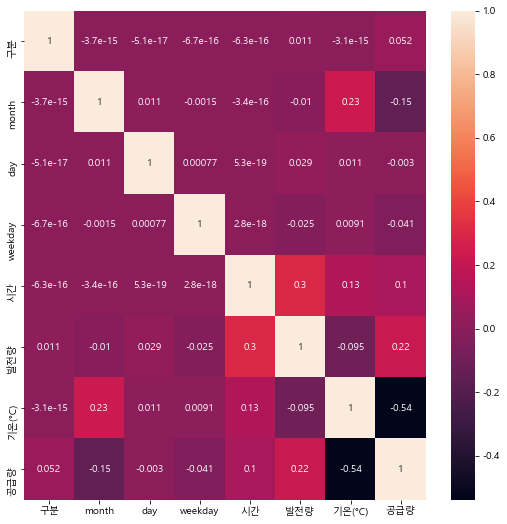

In [114]:
feature = ['구분', 'month', 'day', 'weekday', '시간', "발전량" ,'기온(°C)', '공급량']
train_co = train[feature]

train_co.corr()

plt.figure(figsize=(9,9))
sn.heatmap(train_co.corr(), annot=True)

### score 확인

In [115]:
### 공급량 예측 - 모든 특성을 다 집어 넣었을 경우.
from sklearn.metrics import mean_squared_error, r2_score

predict_test = model.predict(val_x)

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  24906.06038459321
R2 score:  0.9755670848827989


### StandardScaler (정규화) + 특성 선택(>=0.15) - 적용하지 않을 예정.

In [116]:
# test = pd.read_csv("./data/test.csv")
# sub = pd.read_csv("./data/sample_submission.csv")

In [160]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [178]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'day', 'weekday', '시간', "발전량" ,'기온(°C)']

# train_x, val_x, train_y, val_y 

train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [190]:
## 다중 회귀 모델 (degree로 특성 늘리기)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_x)
train_poly = poly.transform(train_x)
print(train_poly.shape)

(306768, 791)


In [191]:
test_poly = poly.transform(val_x)

In [192]:
## 규제
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [193]:
d_train = lgb.Dataset(train_scaled, train_y)
d_val = lgb.Dataset(test_scaled, val_y)

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018
         }

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.508962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 184132
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 791
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l2: 722297
[40]	valid_0's l2: 514877
[60]	valid_0's l2: 372151
[80]	valid_0's l2: 273349
[100]	valid_0's l2: 204693
[120]	valid_0's l2: 156318
[140]	valid_0's l2: 122182
[160]	valid_0's l2: 97755.9
[180]	valid_0's l2: 80116.5
[200]	valid_0's l2: 67441.1
[220]	valid_0's l2: 57942.7
[240]	valid_0's l2: 51099.6
[260]	valid_0's l2: 45790.9
[280]	valid_0's l2: 41731.1
[300]	valid_0's l2: 38734
[320]	valid_0's l2: 36341.7
[340]	valid_0's l2: 34520.9
[360]	valid_0's l2: 33083.2
[380]	valid_0's l2: 31847.1
[400]	valid_0's l2: 30813.2
[420]	valid_0's l2: 30041.7
[440]	valid_

In [194]:
from sklearn.metrics import mean_squared_error, r2_score

predict_test = model.predict(test_scaled)

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  25284.566580018487
R2 score:  0.9751957692430968


In [155]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mae', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018
}

model = lgb.train(params, d_train, 5000, d_val, verbose_eval=20, early_stopping_rounds=100)

C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 7
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l1: 635.671
[40]	valid_0's l1: 539.149
[60]	valid_0's l1: 466.451
[80]	valid_0's l1: 399.339
[100]	valid_0's l1: 345.41
[120]	valid_0's l1: 300.853
[140]	valid_0's l1: 262.858
[160]	valid_0's l1: 233.879
[180]	valid_0's l1: 207.152
[200]	valid_0's l1: 186.821
[220]	valid_0's l1: 169.474
[240]	valid_0's l1: 155.965
[260]	valid_0's l1: 144.85
[280]	valid_0's l1: 135.703
[300]	valid_0's l1: 127.979
[320]	valid_0's l1: 122.24
[340]	valid_0's l1: 117.528
[360]	valid_0's l1: 113.264
[380]	valid_0's l1: 109.731
[40

In [124]:
# predict_test = model.predict(val_x)

# mse = mean_squared_error(val_y, predict_test)
# r2 = r2_score(val_y, predict_test)

# print('Mean squared error: ', mse)
# print('R2 score: ', r2)

In [156]:
from sklearn.metrics import mean_squared_error, r2_score

predict_test = model.predict(val_x)

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  24649.023552892235
R2 score:  0.9758192387358758


### StandardScaler

In [126]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'day', 'weekday', '시간', "발전량" ,'기온(°C)']

# train_x, val_x, train_y, val_y 

train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [157]:
## 규제
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_x)
train_scaled = ss.transform(train_x)
test_scaled = ss.transform(val_x)

In [158]:
d_train = lgb.Dataset(train_scaled, train_y)
d_val = lgb.Dataset(test_scaled, val_y)

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mae', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':42
         }

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 7
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l1: 639.164
[40]	valid_0's l1: 541.817
[60]	valid_0's l1: 477.35
[80]	valid_0's l1: 410.561
[100]	valid_0's l1: 356.986
[120]	valid_0's l1: 310.677
[140]	valid_0's l1: 273.745
[160]	valid_0's l1: 244.134
[180]	valid_0's l1: 216.566
[200]	valid_0's l1: 194.749
[220]	valid_0's l1: 175.436
[240]	valid_0's l1: 161.379
[260]	valid_0's l1: 150.18
[280]	valid_0's l1: 139.43
[300]	valid_0's l1: 130.732
[320]	valid_0's l1: 124.483
[340]	valid_0's l1: 118.939
[360]	valid_0's l1: 114.123
[380]	valid_0's l1: 110.565
[40

In [159]:
predict_test = model.predict(test_scaled)

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  24546.727737721496
R2 score:  0.9759195912175738


### MinMaxScaler

In [130]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
mm.fit(train_x)
train_scaled = mm.transform(train_x)
test_scaled = mm.transform(val_x)

In [131]:
d_train = lgb.Dataset(train_scaled, train_y)
d_val = lgb.Dataset(test_scaled, val_y)

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mae', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':42
         }

model = lgb.train(params, d_train, 1000, d_val, verbose_eval=20, early_stopping_rounds=100)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 5
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds


C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's l1: 631.275
[40]	valid_0's l1: 528.824
[60]	valid_0's l1: 445.696
[80]	valid_0's l1: 378.545
[100]	valid_0's l1: 324.399
[120]	valid_0's l1: 280.683
[140]	valid_0's l1: 245.616
[160]	valid_0's l1: 217.53
[180]	valid_0's l1: 195.281
[200]	valid_0's l1: 177.683
[220]	valid_0's l1: 163.827
[240]	valid_0's l1: 153.04
[260]	valid_0's l1: 144.58
[280]	valid_0's l1: 137.94
[300]	valid_0's l1: 132.839
[320]	valid_0's l1: 128.896
[340]	valid_0's l1: 125.586
[360]	valid_0's l1: 122.877
[380]	valid_0's l1: 120.818
[400]	valid_0's l1: 119.05
[420]	valid_0's l1: 117.61
[440]	valid_0's l1: 116.455
[460]	valid_0's l1: 115.443
[480]	valid_0's l1: 114.588
[500]	valid_0's l1: 113.894
[520]	valid_0's l1: 113.365
[540]	valid_0's l1: 112.838
[560]	valid_0's l1: 112.539
[580]	valid_0's l1: 112.271
[600]	valid_0's l1: 111.994
[620]	valid_0's l1: 111.779
[640]	valid_0's l1: 111.529
[660]	valid_0's l1: 111.363
[680]	valid_0's l1: 111.226
[700]	valid_0's l1: 111.144
[720]	valid_0's l1: 111.046
[7

In [132]:
predict_test = model.predict(test_scaled)

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  33363.985009238204
R2 score:  0.9672698370952896


### 전체 체크

In [146]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'weekday', '시간' ,'기온(°C)', "발전량"]

# train_x, val_x, train_y, val_y

train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [147]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018
}

model = lgb.train(params, d_train, 5000, d_val, verbose_eval=20, early_stopping_rounds=100)

C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jypark\anaconda3\lib\site-packages\lightgbm\engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 6
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 100 rounds
[20]	valid_0's l2: 751053
[40]	valid_0's l2: 558071
[60]	valid_0's l2: 411793
[80]	valid_0's l2: 310029
[100]	valid_0's l2: 242185
[120]	valid_0's l2: 190000
[140]	valid_0's l2: 148551
[160]	valid_0's l2: 120353
[180]	valid_0's l2: 98413.2
[200]	valid_0's l2: 82380.3
[220]	valid_0's l2: 69798
[240]	valid_0's l2: 60244
[260]	valid_0's l2: 53344.2
[280]	valid_0's l2: 47855.6
[300]	valid_0's l2: 43771.8
[320]	valid_0's l2: 40116.6
[340]	valid_0's l2: 37024.5
[360]	valid_0's l2: 34863.2
[380]	valid_0's l2: 33304.7
[400]	valid_

In [148]:
from sklearn.metrics import mean_squared_error, r2_score

predict_test = model.predict(val_x)

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  24798.451798518785
R2 score:  0.9756726492076595


In [136]:
test

,일자|시간|구분,일자,시간,구분,year,month,day,weekday,발전량,기온(°C)
0,2019-01-01 01 A,2019-01-01,1,0,2019,1,1,1,56526.524352,-3.254073
1,2019-01-01 02 A,2019-01-01,2,0,2019,1,1,1,56526.524352,-3.608198
2,2019-01-01 03 A,2019-01-01,3,0,2019,1,1,1,56526.524352,-3.935810
3,2019-01-01 04 A,2019-01-01,4,0,2019,1,1,1,56526.524352,-4.113031
4,2019-01-01 05 A,2019-01-01,5,0,2019,1,1,1,56526.524352,-4.464113
...,...,...,...,...,...,...,...,...,...,...
15115,2019-03-31 20 H,2019-03-31,20,6,2019,3,31,6,57193.670350,10.672685
15116,2019-03-31 21 H,2019-03-31,21,6,2019,3,31,6,56801.651616,9.888458
15117,2019-03-31 22 H,2019-03-31,22,6,2019,3,31,6,55861.421211,9.103264
15118,2019-03-31 23 H,2019-03-31,23,6,2019,3,31,6,55722.298643,8.584424


### XGBOOST

In [137]:
!pip install xgboost

In [138]:
import xgboost as xgb

In [149]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

train = df[df['year'].isin(train_years)]
val = df[df['year'].isin(val_years)]

features = ['구분', 'month', 'weekday', '시간' ,'기온(°C)', "발전량"]

# train_x, val_x, train_y, val_y

train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [150]:
dtrain = xgb.DMatrix(data=train_x, label = train_y)
dval = xgb.DMatrix(data=val_x, label = val_y)
wlist = [(dtrain, 'train'), (dval,'eval')]

params = {
    'learning_rate': 0.05,
    'objective': 'reg:squarederror',
    'metric':'mae', 
    'seed':42
}
 

model = xgb.train( params, dtrain, 1000, evals=wlist, verbose_eval=20, early_stopping_rounds=100)

[09:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "metric" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:1241.66540	eval-rmse:1368.59119
[20]	train-rmse:493.16626	eval-rmse:607.82611
[40]	train-rmse:248.02171	eval-rmse:341.85879
[60]	train-rmse:172.75159	eval-rmse:243.40669
[80]	train-rmse:147.89572	eval-rmse:203.77271
[100]	train-rmse:136.02408	eval-rmse:184.63533
[120]	train-rmse:129.67525	eval-rmse:174.54820
[140]	train-rmse:125.62381	eval-rmse:168.82754
[160]	train-rmse:122.80066	eval-rmse:165.64264
[180]	train-rmse:120.85148	eval-rmse:163.53259
[200]	train-rmse:119.34251	eval-rmse:162.05629
[220]	train-rmse:117.68780	eval-rmse:160.76346
[240]	train-rmse:116.5261

In [151]:
test_x = test[features]
test_x = xgb.DMatrix(test_x)

In [152]:
preds = model.predict(test_x)
preds

array([1985.7374 , 1714.7625 , 1672.4259 , ...,  367.49033,  338.76523,
        309.9403 ], dtype=float32)

In [153]:
predict_test = model.predict(xgb.DMatrix(val_x))

mse = mean_squared_error(val_y, predict_test)
r2 = r2_score(val_y, predict_test)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  24836.00095305641
R2 score:  0.9756358133817049


In [144]:
sub['공급량'] = preds
sub

,일자|시간|구분,공급량
0,2019-01-01 01 A,1934.565796
1,2019-01-01 02 A,1681.130737
2,2019-01-01 03 A,1568.175293
3,2019-01-01 04 A,1609.532837
4,2019-01-01 05 A,1775.065918
...,...,...
15115,2019-03-31 20 H,367.213165
15116,2019-03-31 21 H,378.723511
15117,2019-03-31 22 H,348.637634
15118,2019-03-31 23 H,334.713226


In [145]:
# sub.to_csv('elect_temp_xgboost.csv', index=False)